# Practical 2

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2021-11-11

**Abstract**: In this practical session we look at the second aspect of
the Fynesse data science process, *assess*. In particular, we are going
to download data from OpenStreetMap and verify its quality and utility.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Tick Session for this Practical is 16th November 2021

## Revert Matplotlib Version

Revert `matplotlib` version on Google Colab due to bug mentioned
[here](https://github.com/facebook/prophet/issues/1691).

In [2]:
%pip install osmx

In [3]:
%pip uninstall --yes matplotlib

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Successfully uninstalled matplotlib-3.1.3


In [4]:
%pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_notebooks/includes/notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_notebooks/includes/notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used

The software can be installed using

In [6]:
%pip install notutils

from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [7]:
import notutils

## mlai

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [8]:
%pip install mlai

from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [9]:
import mlai

## Mapping Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_maps/includes/mapping-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_maps/includes/mapping-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Many of the questions we ask in data science are about how we live, who
we are and how we might live better. So it is no surprise that an
important source of information for data science comes from *mapping
data*.

Questions about how best to make deliveries, where to locate facilities,
national disease susceptibility, how to get to work, where to go for a
walk, disaster response[1] and a myriad of other applications.

The wider field of geospatial data analysis is also vital for monitoring
our environment and human activity[2] on our globe.

With all of this in mind, mapping data seems an appropriate domain in
which to explore how we can assess a data set for use in a particular
data science domain.

In this practical session, you will learn how to download data from
OpenStreetMap, in particular we will focus on *points of interest* in
OpenStreetMap. We will explore the utility of points of interest as a
way of adding features into our models. We will introduce the notion of
a basis function. In spatial data the basis functions we use will become
features on the landscape.

Before we start, we’ll introduce a few other ideas to inspire how you
think about the data you collage. In particular, a tool for creating
“play data” and we’ll introduce you to the interactive funcitonality of
the notebook.

[1] For example the [OpenStreetMap response to the 2010 Haiti
Earthquake](https://blog.openstreetmap.org/2010/01/14/haiti-openstreetmap-response/).

[2] For example this [UN Global
Pulse](https://www.unglobalpulse.org/project/measuring-poverty-with-machine-roof-counting/)
project which measures roof material as a proxy for poverty levels.

## Playing with Data Draw

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/drawdata-play.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/drawdata-play.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This section is inspired by [a blog post by Tony
Hirst](https://blog.ouseful.info/)[1] who talks about the importance of
*play*.

> One of the most powerful learning techniques I know that works for me
> is play, the freedom to explore an idea or concept or principle in an
> open-ended, personally directed way, trying things out, test them,
> making up “what if?” scenarios, and so on.
>
> Playing takes time of course, and the way we construst courses means
> that we donlt give students time to play, preferring to overload them
> with lots of stuff read, presumably on the basis that stuff = value.
>
> If I were to produce a 5 hour chunk of learning material that was
> little more three or four pages of text, defining various bits of
> playful activity, I suspect that questions would be asked on the basis
> that 5 hours of teaching should include lots more words… I also
> suspect that the majority of students would not know how to play
> consructively within the prescribed bounds for that length of time.
>
> Tony Hirst (Hirst, 2021)

OK, we’ll try and keep this session below five hours, but Tony’s
instinct is quite correct here. You will learn more from playing with
data than in any formal session. So let’s give it a try in the way Tony
suggests.

[1] Many of the most interesting blog posts are hard to find on Google
because it’s become dominate by sites that are well optimized for search
engines. Even when useful, I find the click-bait titles of the posts
that surface on sites like towardsdatascience off-putting: “Four ways of
Plotting Data you Must Know About” or “Eight Things Every Data Scientist
Sould Know” or “Do you remember this ggplot command? You won’t believe
what it looks like today!” or “Five Other Cambridge Data Scientists are
Currently Using this Trick to Understand their Data.” OK … I made the
last two up. Well I made them all up, but I’ve not seen ones like the
last two … but I have seen snippets of useful information masquerading
under the other titles on medium/towardsdatascience, but the overall
posts are usually quite vacuous.

## Drawdata Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/drawdata-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/drawdata-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `drawdata` package is made available by [Vincent D.
Warmerdam](https://github.com/koaning) for drawing datasets within the
Jupyter notebook. You can find it on [Github
here](https://github.com/koaning/drawdata). See also [this
page](https://calmcode.io/labs/drawdata.html).

In [10]:
%pip install drawdata

In [11]:
from drawdata import draw_scatter

Now you can draw scatter data to your heart’s content. You can select
one of the groups and draw a region which will be filled roughly with
random dots.

In [12]:
draw_scatter()

### On a Local Machine

If you are running this on a local machine then copy the data to the
clipboard by pressing `copy csv` and convert to a `DataFrame` as
follows.

In [13]:
# import pandas as pd

In [14]:
# data = pd.read_clipboard(sep=",")

### On Google Colab

Otherwise, on Google Colab you can download the file to your local
machine, it will save as `data.csv`. Then you can upload that data into
Colab as follows.

In [15]:
import io
from google.colab import files

In [21]:
uploaded = files.upload()
data = pd.read_csv(io.StringIO(uploaded["data.csv"].decode("utf-8")))

Saving data.csv to data (4).csv


### Name the Drawdata Dataframe

In [22]:
drawdata_data = data

## Simpson’s Paradox

We introduced [Simpson’s
paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) briefly in
the “Review and Refresh” lab session.

### Exercise 1

Use `drawdata` to construct a data set that exhibits Simpson’s paradox.

Here’s some pandas functionality you might find useful,

    pd.DataFrame.corr?

and

    pd.DataFrame.groupby?

In [23]:
# Write your answer to Exercise 1 here

general_corr = drawdata_data.corr(method='pearson')
pieceby_corr = drawdata_data.groupby(by=["z"]).corr(method='pearson')
print(general_corr)
print(pieceby_corr)

          x         y
x  1.000000 -0.584888
y -0.584888  1.000000
            x         y
z                      
a x  1.000000  0.831755
  y  0.831755  1.000000
b x  1.000000  0.737068
  y  0.737068  1.000000
c x  1.000000  0.782229
  y  0.782229  1.000000
d x  1.000000  0.884199
  y  0.884199  1.000000


In [24]:
print('All Data: ', general_corr.loc['x']['y'])
for subset in ['a', 'b', 'c', 'd']:
  print('Subset "'+subset+'": ',pieceby_corr.loc[subset,'x']['y'])

All Data:  -0.5848882589538877
Subset "a":  0.8317551053851957
Subset "b":  0.7370680803452592
Subset "c":  0.7822293400393621
Subset "d":  0.8841987702216062


[link text](https://)If you want to play some more, why not try and create your own drawing
of a Gorilla that gives plausible correlation values for a BMI dataset?
But don’t spend five hours on this! If you want to draw the data with
lines, you can use `draw_line` from `drawdata` instead of
`draw_scatter`.

In [25]:
data_interact = drawdata_data

## Interaction in Jupyter Notebook

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/dataframe-interact.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/dataframe-interact.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

As well as providing plotting capabilities, the notebook gives us the
capability to interact with python objects. We can design custom
interaces to work with the data we have.

Here we are inspired by a blog post from Tony Hirst (Hirst, 2016).

The Jupyter notebook was originally introduced by the IPython project.
For that reason it’s widgets are nown as `ipywidgets`. These widgets are
one of the most powerful features of the notebook. They allow you to
create your own customised interaction interfaces for the data.

The key functionality is included in the function `interact`.

In [26]:
import ipywidgets as widgets
from ipywidgets import interact, fixed
from IPython.display import display

The first trick is to write a callback function. This callback function
will display the data frame as required.

In [27]:
def view_df(dataframe, column=None, item="all"):
    """This helper function displays a DataFrame, filtering a given column on a particular item"""
    if column is None:
        column = dataframe.columns[0]
    if item=="all": 
        display(dataframe)
    display(dataframe[dataframe[column]==item])

Now we can easily create selection boxes by passing a keyword arguments
to `interact` alongside the callback function. If the keyword arguments
contain lists, then interact interprets that as a request to form a
selection box to pass to the callback function for that keyword
argument. The special interact style `fixed` is interpreted as
information that is passed directly to the function (i.e. not user
selected).

We’ll select column `z` to operate on and allow us to select from the
unique values in that column (which represent the classes `a` through
`d` for filtering.

In [28]:
column = "z"
items = ["all"] + sorted(data_interact[column].unique().tolist())

Now we can create the interact.

---



In [29]:
_ = interact(view_df,
             dataframe=fixed(data_interact), 
             column=fixed(column),
             item=items)

interactive(children=(Dropdown(description='item', options=('all', 'a', 'b', 'c', 'd'), value='all'), Output()…

In [30]:
item_select = widgets.Select(options=["all"] + sorted(data_interact[column].unique().tolist()))

You can [read more about the available widgets in the
documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

Let’s make use of the `IntSlider` widget and the `Select` widget to
limit the number of rows we display from the data frame. To do this we
first introduce a new callback function.

In [31]:
def view_df2(dataframe, item="all", column=None, number=3):
    if column is None:
        column = dataframe.columns[0]
    if item=="all": 
        display(dataframe.head(number))
    display(dataframe[dataframe[column]==item].head(number))

Now we introduce a slider.

In [32]:
number_slider = widgets.IntSlider(min=0, max=15, step=1, value=5)
item_select = widgets.Select(options=items)

In [33]:
_ = interact(view_df2, dataframe=fixed(data_interact),
             column=fixed("z"),
             item=item_select,
             number=number_slider)

interactive(children=(Select(description='item', options=('all', 'a', 'b', 'c', 'd'), value='all'), IntSlider(…

### Exercise 2

Update the interact to have a `FloatSlider` element that filters out
elements from column `x` or `y` (by choice) if they are above a
particular value.

In [34]:
# Write your answer to Exercise 2 here

def view_df3(dataframe, axis=None, maximum_value=500):
    if axis is None:
        axis = 'x'
    display(dataframe.loc[dataframe[axis] <= maximum_value])

number_slider3 = widgets.IntSlider(min=0, max=1000, step=1, value=500)
item_select3 = widgets.Select(options=['x', 'y'])

_ = interact(view_df3, dataframe=fixed(data_interact),
             axis=item_select3,
             maximum_value=number_slider3)

interactive(children=(Select(description='axis', options=('x', 'y'), value='x'), IntSlider(value=500, descript…

## Accessing Open Street Map

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_maps/includes/open-street-map.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_maps/includes/open-street-map.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [50]:
%pip install osmnx
%pip uninstall --yes matplotlib
%pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Successfully uninstalled matplotlib-3.4.3
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [51]:
import osmnx as ox
import matplotlib.pyplot as plt

We will center out download on the city of Kamplala, Uganda, which has
the following latitude and longitude.

In [52]:
place_name = "Kampala, Uganda"

latitude = 0.347596 # Kampala latitude
longitude = 32.582520 # Kampala longitude

In [53]:
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km ([circumference of the Earth is around 40,000
km](https://en.wikipedia.org/wiki/Metre) and 40,000/360=111km).

In [54]:
box_width = 0.02 # About 2.2 km
box_height = 0.02
north = latitude + box_height/2
south = latitude - box_width/2
west = longitude - box_width/2
east = longitude + box_width/2

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows.

In [55]:
# Retrieve POIs
tags = {"amenity": True, 
        "buildings": True, 
        "historic": True, 
        "leisure": True, 
        "shop": True, 
        "tourism": True}

Now we can use `osmx` to download all such points of interest within a
given bounding box.

In [56]:
pois = ox.geometries_from_bbox(north, south, east, west, tags)

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found.

In [57]:
print("There are {number} points of interest surrounding {placename} latitude: {latitude}, longitude: {longitude}".format(number=len(pois), placename=place_name, latitude=latitude, longitude=longitude))

There are 824 points of interest surrounding Kampala, Uganda latitude: 0.347596, longitude: 32.58252


And then we can examine their contents in more detail.

In [58]:
pois.info

<bound method DataFrame.info of                              amenity  cuisine  ... guest_house smoking
element_type osmid                             ...                    
node         599171967    restaurant  mexican  ...         NaN     NaN
             599171968           NaN      NaN  ...         NaN     NaN
             599171969           NaN      NaN  ...         NaN     NaN
             599171971      pharmacy      NaN  ...         NaN     NaN
             601370312          fuel      NaN  ...         NaN     NaN
...                              ...      ...  ...         ...     ...
way          749930994       parking      NaN  ...         NaN     NaN
             856274788  kindergarten      NaN  ...         NaN     NaN
             856274789  kindergarten      NaN  ...         NaN     NaN
             858227179           NaN      NaN  ...         NaN     NaN
             932375082           NaN      NaN  ...         NaN     NaN

[824 rows x 109 columns]>

We notice a few things.

---



1.  Points of interest do not have a consistent OpenStreetMap
    `element_type`, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

2.  Many of the values are missing. In SQL we would express a missing
    value as `NULL`. But in `pandas` a missing value is expressed as
    not-a-number, `NaN`. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different *keys*
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent. The `gdf` we recover places these keys in its columns, but if

So we might be interested in the following keys.

In [59]:
keys = ["name",
        "addr:city",
        "addr:postcode",
        "amenity",
        "building",
        "building:name",
        "building:colour",
        "building:material",
        "historic",
    "memorial",
        "religion",
        "tourism",
        "emergency",
        "leisure",
        "shop"]

But our downloaded `gdf` may have fewer keys.

In [60]:
pois.columns.values

array(['amenity', 'cuisine', 'name', 'phone', 'website', 'geometry',
       'shop', 'brand', 'brand:wikidata', 'brand:wikipedia', 'capacity',
       'healthcare', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:street', 'branch', 'note', 'opening_hours', 'wheelchair',
       'designation', 'atm', 'operator', 'internet_access',
       'outdoor_seating', 'alt_name', 'drive_through', 'level',
       'takeaway', 'email', 'tourism', 'contact:email',
       'contact:facebook', 'contact:instagram', 'contact:phone',
       'internet_access:fee', 'facebook', 'network', 'short_name',
       'fixme', 'addr:suburb', 'office', 'leisure', 'sport', 'lit',
       'parking', 'supervised', 'surface', 'addr:flats', 'covered', 'fee',
       'female', 'male', 'contact:website', 'description', 'bed_count',
       'check_date:opening_hours', 'wikidata', 'name:en', 'building',
       'function', 'religion', 'information', 'name:de', 'access',
       'addr:place', 'legal', 'recycling_type', 'wast

We can write a short piece of code to discover which keys are missing
drom the data frame’s columns.

In [61]:
for key in keys:
    if key not in pois.columns:
        print(key)
        
present_keys = [key for key in keys if key in pois.columns]
pois[present_keys]

addr:postcode
building:name
building:colour
building:material
historic
memorial


name  ...         shop
element_type osmid                                       ...             
node         599171967                         Que Pasa  ...          NaN
             599171968           Millennium Supermarket  ...  supermarket
             599171969                         Checkers  ...  supermarket
             599171971          Makro Pharmacy (U) Ltd.  ...          NaN
             601370312                            Kobil  ...          NaN
...                                                 ...  ...          ...
way          749930994                              NaN  ...          NaN
             856274788  Early childhood learning center  ...          NaN
             856274789  Early childhood learning center  ...          NaN
             858227179                       Salon city  ...  hairdresser
             932375082                              NaN  ...          NaN

[824 rows x 9 columns]

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [62]:
graph = ox.graph_from_bbox(north, south, east, west)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Which we can then render as follows.

In [63]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

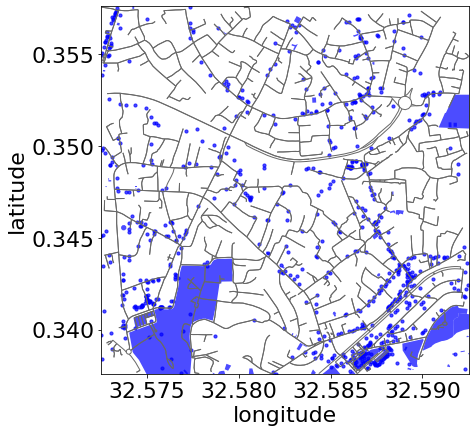

In [64]:
fig, ax = plt.subplots(figsize=plot.big_figsize)

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot all POIs 
pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
plt.tight_layout()
mlai.write_figure(directory="./maps", filename="kampala-uganda-pois.svg")

<img src="https://mlatcl.github.io/ads/./slides/diagrams//maps/kampala-uganda-pois.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Points of Interest as identified in Open Street Map.</i>

In [65]:
tourist_places = pois[pois.tourism.notnull()]

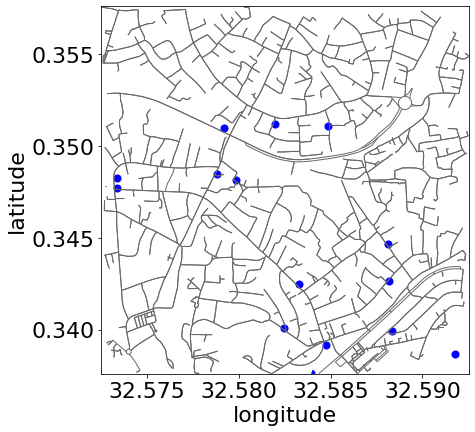

In [66]:
# Plot a subset of the POIs (e.g., tourist places)
# Create figure
fig, ax = plt.subplots(figsize=plot.big_figsize)

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot tourist places 
tourist_places.plot(ax=ax, color="blue", alpha=1, markersize=50)
plt.tight_layout()
mlai.write_figure(directory="./maps", filename="kampala-uganda-tourist-sites.svg")

<img src="https://mlatcl.github.io/ads/./slides/diagrams//maps/kampala-uganda-tourist-sites.svg" class="" width="70%" style="vertical-align:middle;">


Figure: <i>Tourist sites identified as Points of Interest in Open Street
Map.</i>

We have the POIs that are associated with tourist places in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to conveert them to a `pandas` DataFrame. This means dealing
with the geometry. If we examine the POIs.

In [67]:
tourist_places.loc["node"]

,amenity,cuisine,name,phone,website,geometry,shop,brand,brand:wikidata,brand:wikipedia,capacity,healthcare,addr:city,addr:country,addr:housenumber,addr:street,branch,note,opening_hours,wheelchair,designation,atm,operator,internet_access,outdoor_seating,alt_name,drive_through,level,takeaway,email,tourism,contact:email,contact:facebook,contact:instagram,contact:phone,internet_access:fee,facebook,network,short_name,fixme,...,operator:type,backrest,addr:county,addr:district,addr:parish,addr:subcounty,isced:level,operational_status,source,staff_count:teachers,start_date,type,ref,bicycle_parking,place:village,beds,capacity:inpatient,capacity:outpatient,staff_count:doctors,staff_count:nurses,toilets,toilets:access,toilets:num_chambers,generator:source,emergency,contact,operational,nodes,wikipedia,source:date,community_centre,denomination,bus,public_transport,building:levels,multipurpose,contact:twitter,rooms,guest_house,smoking
osmid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3032234586,NaN,NaN,Fat Cat,+256 771 393892,http://www.fatcatkampala.com/,POINT (32.58834 0.33994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bookings@fatcatkampala.com,hostel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4119308804,mobile_money_agent,NaN,Green apple,NaN,NaN,POINT (32.58817 0.34264),NaN,NaN,NaN,NaN,NaN,NaN,Kampala,NaN,NaN,NaN,NaN,NaN,Mo-Sa 08:00-18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,guest_house,NaN,NaN,NaN,NaN,NaN,NaN,Airtel Money;MTN Mobile Money,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942954054,NaN,NaN,Okrut Close,NaN,NaN,POINT (32.59180 0.33868),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5678162422,NaN,NaN,Tagore Apartments,NaN,NaN,POINT (32.58474 0.33914),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7743212629,NaN,NaN,NaN,NaN,NaN,POINT (32.58812 0.34466),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,guest_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445011017,NaN,NaN,Prisma Hotel,0414371122,NaN,POINT (32.57987 0.34816),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kisingiri Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prismahotel@gmail.com,hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8456545033,NaN,NaN,Silverline Condos,NaN,NaN,POINT (32.58329 0.34251),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mawanda Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8456545129,NaN,NaN,Kida Guesthouse,NaN,NaN,POINT (32.57336 0.34773),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mawanda Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,guest_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [68]:
for i in tourist_places["geometry"]["way"]:
    print("latitude: {latitude}, longitude: {longitude}".format(latitude=i.centroid.y, longitude=i.centroid.x))

latitude: 0.3376459150435436, longitude: 32.58405714602133
latitude: 0.34778169999999997, longitude: 32.5727817


## Matching OpenStreetMap and NMIS Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/open-street-map-nigeria-nmis-exercise.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_data-science/includes/open-street-map-nigeria-nmis-exercise.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In this exercise you will download the location of health centres from
OpenStreetMap in Lagos and map them to the health centres you’ve already
viewed in the NMIS data. This is a data validation exercise.

### Exercise 3

The latitude and longitude of Lagos in Nigeria are as follows:

    place_name = "Lagos, Nigeria"

    latitude = 6.5244
    longitude = 3.3792

In OpenStreetMap the key for a health center is `key:healthcare`.
Download the POIs on OpenStreetMap that are listed as health centres and
match them to POIs in the OpenStreetMap data to the health centres we
find in the Nigerian NMIS data (`pods.datasets.nigeria_nmis`).

You may use the distance between the centroid for the match, but you
should also consider any additional checks you might wish to perform.

Ensure your code is reusable, making it easy to integrate any necessary
human feedback as required.

You may need to vary the size of the bounding box to get matches. Use
your reusable code to ensure that you obtain at least five matches
between the data set (by increasing bounding box size).

Now further demonstrate the reuse by performing the same analysis for
Abuja.

    place_name = "Abuja, Nigeria"

    latitude = 9.05785 
    longitude = 7.49508

In [228]:
# Write your answer to Exercise 3 here
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

import pods

nmis_data = pods.datasets.nigeria_nmis()['Y']

In [265]:
place_name = "Lagos, Nigeria"
latitude = 6.5244
longitude = 3.3792

# place_name = "Abuja, Nigeria"
# latitude = 9.05785 
# longitude = 7.49508

box_size = 10 # In km

placestub = place_name.lower().replace(' ', '-').replace(',','')
box_width = box_size/2.2*0.02 
box_height = box_size/2.2*0.02
north = latitude + box_height/2
south = latitude - box_height/2
west = longitude - box_width/2
east = longitude + box_width/2
tags = {"healthcare": True}
pois = ox.geometries_from_bbox(north, south, east, west, tags)
print(pois)

                                                                  geometry  ... building
element_type osmid                                                          ...         
node         5781786543                            POINT (3.37423 6.50628)  ...      NaN
             7234360265                            POINT (3.38809 6.49010)  ...      NaN
             8839228501                            POINT (3.39619 6.53503)  ...      NaN
             8839228502                            POINT (3.39641 6.53173)  ...      NaN
             8839282652                            POINT (3.39688 6.52909)  ...      NaN
             8839282653                            POINT (3.39615 6.52828)  ...      NaN
             8839346181                            POINT (3.39962 6.52710)  ...      NaN
             8839346182                            POINT (3.39896 6.52434)  ...      NaN
             8839346183                            POINT (3.39997 6.53398)  ...      NaN
             88393461

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [266]:
healthcare_places = pois[pois.healthcare.notnull()]
# print(healthcare_places[['name','geometry']])
# print(healthcare_places.columns)
geometries = healthcare_places['geometry']
longitudes = []
latitudes = []
for geometry in geometries:
  latitudes.append(geometry.centroid.y)
  longitudes.append(geometry.centroid.x)
healthcare_places['latitude'] = latitudes
healthcare_places['longitude'] = longitudes
# print(healthcare_places[['name', 'latitude', 'longitude']])

In [267]:
# print(nmis_data[['facility_name', 'latitude', 'longitude']])
filtered_nmis_data = nmis_data.loc[(nmis_data['latitude'] >= south) & (nmis_data['latitude'] <= north) & (nmis_data['longitude'] >= west) & (nmis_data['longitude'] <= east)]

In [268]:
print(filtered_nmis_data[['facility_name', 'latitude', 'longitude']])
print(healthcare_places[['name', 'latitude', 'longitude']])

                                           facility_name  latitude  longitude
278                                          Akerele Phc  6.505716   3.354829
296                                         EKO HOSPITAL  6.505384   3.354479
1413                      Regina mundi catholic hospital  6.527256   3.355761
1416                                  Crusaints Hospital  6.542475   3.359849
1417                      Bridie mends memorial hospital  6.521136   3.364899
...                                                  ...       ...        ...
33553                Wright Memorial Primary Health Care  6.539784   3.371645
33669                                  Orisegun Hospital  6.524929   3.349589
33791                                   ITIRE IJESHA PHC  6.509875   3.337169
33912  Randle General Hospital marternity And Child c...  6.504255   3.359474
34128                           MARANATHA MEDICAL CENTER  6.529215   3.380369

[346 rows x 3 columns]
                                        

In [269]:
def preformat(name):
  name = str(name).lower()
  name = name.replace('phc', 'P H C')
  name = name.replace('primary', 'P')
  name = name.replace('health', 'H')
  name = name.replace('centre', 'C')
  name = name.replace('center', 'C')
  name = name.replace('care', 'CA')
  name = name.replace('care', 'CA')
  name = name.replace('medical', 'M')
  name = name.replace('hospital', 'HO')
  name = name.replace('clinic', 'CL')
  name = name.replace('post', 'PO')
  return name

allowed_mismatch = 0.1 #km
mismatch_box_height = allowed_mismatch/2.2*0.02
mismatch_box_width = allowed_mismatch/2.2*0.02
matchList = []
for nmis_index, nmis_point in filtered_nmis_data[['facility_name', 'latitude', 'longitude']].iterrows():
  for heal_index, heal_point in healthcare_places[['name', 'latitude', 'longitude']].iterrows():
    if abs(nmis_point['latitude']-heal_point['latitude'])<mismatch_box_height and abs(nmis_point['longitude']-heal_point['longitude'])<mismatch_box_width:
      print(nmis_point['facility_name'], (abs(nmis_point['latitude']-heal_point['latitude']), abs(nmis_point['longitude']-heal_point['longitude'])),heal_point['name'])
      distance = (abs(nmis_point['latitude']-heal_point['latitude'])**2 + abs(nmis_point['longitude']-heal_point['longitude'])**2)**0.5
      print(preformat(nmis_point['facility_name']), preformat(heal_point['name']))
      fuzz_ratio = fuzz.ratio(preformat(nmis_point['facility_name']), preformat(heal_point['name']))/100
      print('Name Similarity: ', fuzz_ratio, 'Distance: ', distance/0.02*2.2)
      if fuzz_ratio> 2/3:
        matchList.append((nmis_point, heal_point))

print(matchList)

SOLBI CONTINENTAL HOSPITAL (0.000518314381557694, 0.00025085717707762356) MARANATHA MEDICAL CENTER
solbi continental HO maranatha M C
Name Similarity:  0.12 Distance:  0.06334119804039673
ASHOGBON PHC (6.984000000009871e-05, 9.510000000023666e-05) Asogbon Pry Healthcare Centre
ashogbon P H C asogbon pry HCA C
Name Similarity:  0.77 Distance:  0.012978897902391848
Nordica Fertility center (0.0005213199999998253, 6.498999999982047e-05) nan
nordica fertility C nan
Name Similarity:  0.18 Distance:  0.05778908836664162
Nordica Fertility center (0.0005213199999998253, 6.498999999982047e-05) HealthPlus Pharmacy
nordica fertility C Hplus pharmacy
Name Similarity:  0.18 Distance:  0.05778908836664162
GBAGADA GENERAL HOSPITAL (0.00031219992057085477, 0.000750817181569996) Gbagada General Hospital
gbagada general HO gbagada general HO
Name Similarity:  1.0 Distance:  0.08944530334006612
Parklande specialist hospital (0.000725959809269483, 0.00025941189720679603) Parklande Specialist Hospital
park

In [270]:
for (nmis_index, heal_index) in matchList:
  print(nmis_index, heal_index)
  print()
  print()

facility_name    ASHOGBON PHC
latitude              6.53496
longitude             3.39609
Name: 3962, dtype: object name         Asogbon Pry Healthcare Centre
latitude                           6.53503
longitude                          3.39619
Name: (node, 8839228501), dtype: object


facility_name    GBAGADA GENERAL HOSPITAL
latitude                          6.55213
longitude                          3.3878
Name: 5442, dtype: object name         Gbagada General Hospital
latitude                      6.55244
longitude                     3.38705
Name: (way, 394119616), dtype: object


facility_name    Parklande specialist hospital
latitude                               6.49631
longitude                              3.36098
Name: 8292, dtype: object name         Parklande Specialist Hospital
latitude                           6.49559
longitude                          3.36124
Name: (way, 790442209), dtype: object


facility_name    Maranatha Medical centre
latitude                     

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Hirst, T., 2021. Supporting playful exploration of data clustering and
classification using datadraw.

Hirst, T., 2016. Simple interactive view controls for pandas DataFrames
using IPython widgets in jupyter notebooks.